### 표준 라이브러리 로딩

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. 데이터 적재

In [37]:
picher = pd.read_csv('D:/python3/data/picher_stats_2017.csv')
batter = pd.read_csv('D:/python3/data/batter_stats_2017.csv')

In [38]:
# 기본 데이터셋 정보
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [39]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [40]:
picher.shape

(152, 22)

In [41]:
picher['연봉(2018)'].describe() # -> boxplot 

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

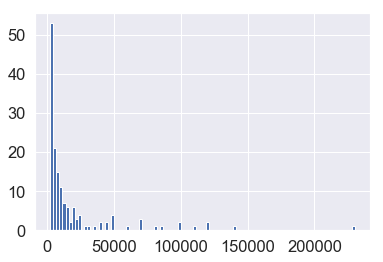

In [42]:
picher['연봉(2018)'].hist(bins = 100)

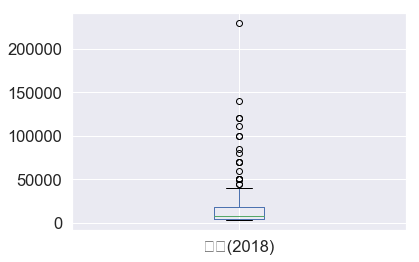

In [43]:
picher.boxplot(column = ['연봉(2018)']) #=> 이상치(o을 표시된 것)를 알아낼 수 있음

### 회귀분석
- 종속변수(반응변수) : 연봉(2018)
- 독립변수(설명변수) : 그외

In [44]:
# 정규화 -> min_max법 => 0 100프로
#        -> 값의 차이 너무 나면 mean, std 사용.
# 원핫인코딩 : 사과, 포도, 바나나 ( 문자열 )
#            -> 사과 100, 포도 010, 바나나 001 이런식 수치화(factor화)해서 나타냄.

In [45]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [46]:
pichar_feature_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [47]:
# 한글처리와 시각화 설정작업
import matplotlib as mpl
# 현재 os 내에 설치된 폰트를 확인
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'Arial',
 'Bahnschrift',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'HoloLens MDL2 Assets',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MV Boli',
 'Malgun Gothic',
 'Marlett',
 'Microsoft Himalaya',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft Yi Baiti',
 'Mongolian Baiti',
 'Myanmar Text',
 'Nirmala UI',
 'Palatino Linotype',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'Segoe MDL2 Assets',
 'Segoe Print',
 'Segoe Script',
 'Segoe UI',
 'Segoe UI Emoji',
 'Segoe UI Historic',
 'Segoe UI Symbol',
 'SimSun-ExtB',
 'Sylfaen',
 'Symbol',
 '

In [48]:
mpl.rc('font', family = 'Malgun Gothic') # family : 글자체

In [49]:
# 각 피처에 대한 histogram
def plot_hist(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

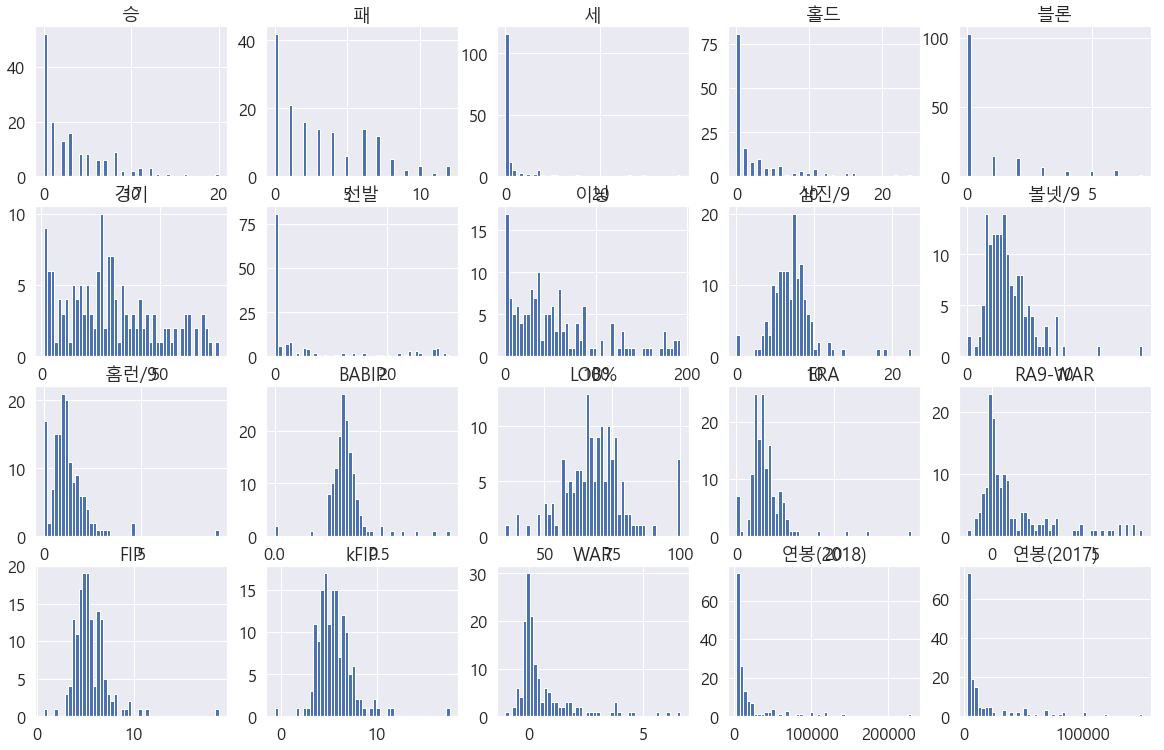

In [50]:
plot_hist(pichar_feature_df)

### 예측 : 투수 연봉(2018년)

In [51]:
# 피처의 정규화 or 스케일링
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2017)']

### 정규화 작업
- 최소_최대값 정규화(min_max)
    Min_Max
        ( Xnew = x - min(X) ) / ( max(X) - min(X) )
- 평균과 표준편차를 이용한 정규화(z-값)
    Z-value
        Xnew = ( X - mean(X) ) / std(X)

In [52]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/(series_std))
    return df

In [53]:
picher_df = standard_scaling(picher, scale_columns)

In [54]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [55]:
picher_df = picher_df.rename(columns = {'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [56]:
# 범주형 데이터 '팀명'을 정규화 : 원핫인코딩 - get_dummies()
team_scaling = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher_df.join(team_scaling)
team_scaling.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


### train data와 test data 분리하는 작업

In [57]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#데이터는 대문자 X, 레이블은 소문자 y
y = picher_df['y']
# 선수명과 'y'를 뺀 나머지는 데이터다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # difference() ~뺀 나머지

# train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 19)

In [59]:
X_train.shape

(121, 28)

In [60]:
X_test.shape

(31, 28)

### 모델을 생성하고 학습

In [61]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

- 선형회귀분석이라는 것은 선형(직선)을 만들어 내는 것이다.
- 회귀방정식을 만들어 새로운 값이 들어왔을 때 예측.
- statesmodel 라이브러리에 OLS(최소제곱법) 클래스

In [62]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)  # 상수항 추가하는 작업-> 상수를 적어서 선을 움직여야 한다.
model = sm.OLS(y_train, X_train).fit()
# model = sm.OLS.from_formula('y_train ~ X_train', data = picher_df)
model.summary()

# 결정계수(수정계수) R-squared: 0.928 -> 얼마나 잘만들었나 ( 평가 지수 )
# 모델의 적합도 F-statistic: 44.19
# p-value : Prob (F-statistic): 7.70e-42

C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 11 May 2021   Prob (F-statistic):           7.70e-42
Time:                        16:13:32   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.44e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

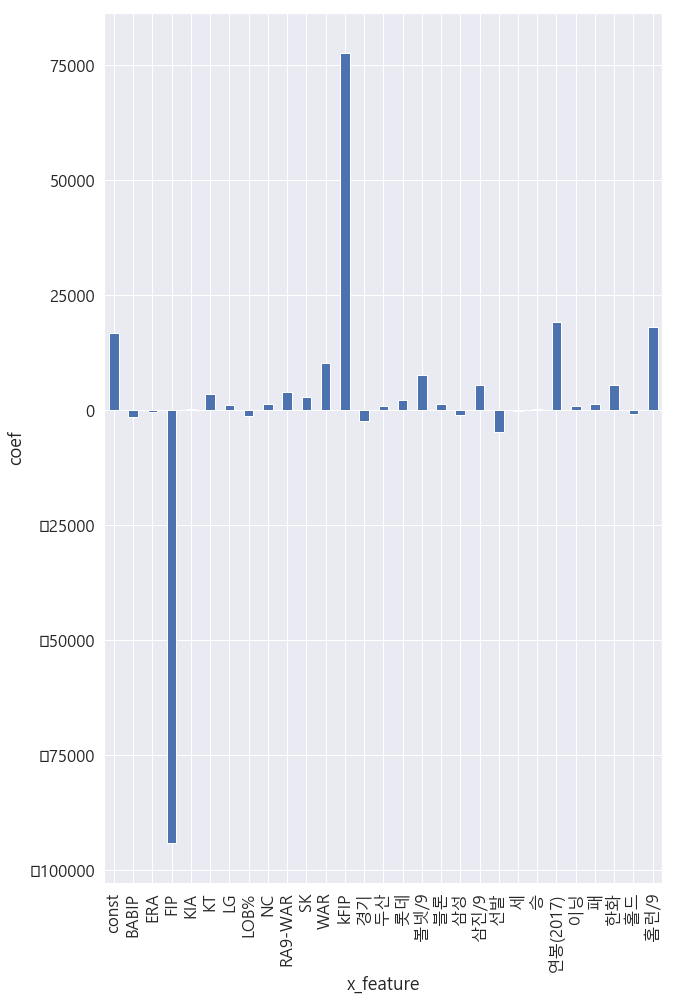

In [63]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [10,  16]
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels)
plt.show()

# 양으로 너무 크거나 음으로 너무 크면 좋지 못한 영향을 줄 수 있다. 

### 예측모델 평가, score

In [64]:
#데이터는 대문자 X, 레이블은 소문자 y
y = picher_df['y']
# 선수명과 'y'를 뺀 나머지는 데이터다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # difference() ~뺀 나머지

# train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

# 회귀모델 생성하고 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀분석 모델 평가
print(model.score(X_train, y_train)) # 큰차이가 나면 model의 일반화가 떨어진다.
print(model.score(X_test, y_test))

0.9276949405576705
0.8860171644977818


### 회귀모델을 평가하는 RMSE score
- RMSE 값이 높을 수록 모델의 예측력이 부정확하다는 것을 의미한다.

In [65]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# train data의 RMSE score (평가값)
y_prediction = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_prediction)))

# test data의 RMSE score (평가값)
y_prediction = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_prediction)))

7282.7186847463745
14310.69643688913


In [66]:
# 분산팽창요인 : 너무 영향이 큰 피처를 drop 시키고 다시 분석

### 피처들의 상관관계를 시각화 : 히트맵

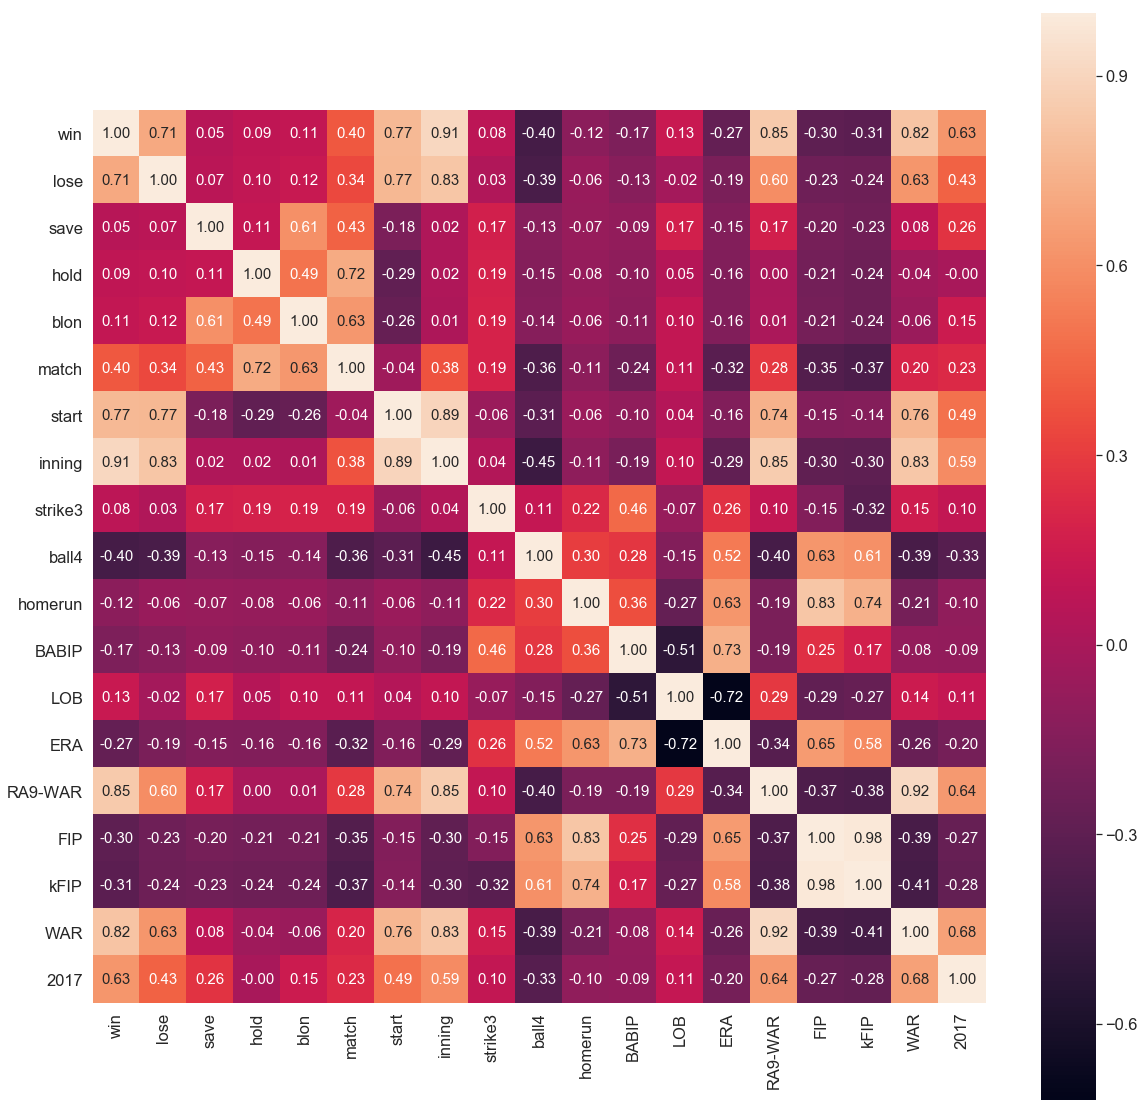

In [67]:
import seaborn as sns
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2017)']

corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 'inning', 'strike3',
       'ball4', 'homerun', 'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '2017']

plt.rcParams['figure.figsize'] = [20,  20]
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)       # 폰트 비율
hm = sns.heatmap(corr.values,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)
plt.show()

### 다중공선성 
- 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
- 다중 공산성은 분산팽창요인(VIF)이라는 계수로 평가한다.
- VIF 계수가 10 ~ 15 정도를 넘으면 그 피처는 다중 공선성의 문제가 발생했다고 판단한다.
- 다중 공선성의 문제를 해결하는 일반적인 방법은 해당 피처를 drop


In [68]:
# 회귀분석이 예측 성능을 높이기 위한 방법 : 다중 공산성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


In [34]:
# # 적절한 위치를 선택해서 회귀분석 사용
# X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
# y = picher_df['y']

# # train : test = 8 : 2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [35]:
# # 회귀모델 생성하고 학습
# lr = linear_model.LinearRegression()
# model = lr.fit(X_train, y_train)

In [36]:
# # 회귀분석 모델 평가
# print(model.score(X_train, y_train)) # 큰차이가 나면 model의 일반화가 떨어진다.
# print(model.score(X_test, y_test))

0.9150591192570362
0.9038759653889864


In [69]:
# VIF 계수 출력
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


### 다중 공산성을 제거하기 위한 피처 선별
1. VIF 계수가 높은 feature 제거
2. 단, 유사한 feature의 경우 둘 중 1개만 제거(FIP, kFIP의 경우)
3. 제거 후 VIF 계수 재출력
4. 위 1 ~ 3 과정 반복
5. 회귀분석 수정
6. feature의 p-value 검정

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = picher_df.drop(['선수명', '홈런/9', 'kFIP'], axis = 1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,8.2,승
1,5.7,패
2,3.1,세
3,3.7,홀드
4,3.0,블론
5,14.6,경기
6,39.9,선발
7,63.2,이닝
8,2.2,삼진/9
9,2.6,볼넷/9


### 예상연봉과 실제연봉(2018)을 비교

In [71]:
# 제거 후 다시 모델 만들어서 예측하기.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)
# 회귀모델 생성하고 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [72]:
# 회귀분석 모델 평가
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9276949405576705
0.8860171644977818


In [73]:
# 2018년도 선수 연봉 예측
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,예측연봉(2018)
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,0,0,0,0,1,0,0,0,0,121159.281019
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,0,0,1,0,0,0,0,0,0,90671.950138
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,1,0,0,0,0,0,0,0,0,159263.118960
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,0,0,1,0,0,0,0,0,0,114793.546523
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,0,0,0,0,0,0,1,0,0,101866.233515


In [79]:
# 다시 해보기
picher = pd.read_csv('D:/python3/data/picher_stats_2017.csv')
picher = picher[['선수명', '연봉(2017)']]
picher.head()

result_df = picher_df.sort_values(by=['y'], ascending = False)
result_df.columns
result_df.drop(['연봉(2017)'], axis = 1, inplace = True)
result_df = result_df.merge(picher, on=['선수명'], how= 'left')
#result_df.columns
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉', '예측연봉(2018)', '작년연봉(2017)']
result_df.head()

,선수명,실제연봉,예측연봉(2018),작년연봉(2017)
0,양현종,230000,159263.118960,150000
1,켈리,140000,121159.281019,85000
2,소사,120000,90671.950138,50000
3,정우람,120000,114853.824600,120000
4,레일리,111000,101866.233515,85000
